Observation Analysis

1. There appears to be a positive correlation between mouse weight and average tumor volume. As mouse weight increases, the average tumor volume tends to increase as well. This is indicated by the upward trend of the regression line, suggesting that heavier mice tend to have larger tumor volumes on average.
2. The relationship between mouse weight and average tumor volume seems to follow a roughly linear pattern. The regression line fits the data reasonably well, indicating that changes in mouse weight are associated with relatively predictable changes in average tumor volume within the observed range of weights.
3. While there is a clear trend of increasing tumor volume with increasing weight, there is also noticeable variability in tumor volume among mice of similar weights. This variability is evident from the spread of data points around the regression line. Some mice with higher weights have relatively lower tumor volumes compared to others with similar weights, suggesting that factors beyond weight may influence tumor growth in individual mice.

# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [149]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [88]:
# Read the study results
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [89]:
# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how ="outer", on ="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [90]:
# Checking the number of mice.
mice_count = combined_df["Mouse ID"].nunique()
mice_count


249

In [92]:
# Our data should be uniquely identified by Mouse ID and Timepoint


# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice


array(['g989'], dtype=object)

In [162]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicate_mice_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [167]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df[combined_df["Mouse ID"].isin(duplicate_mice_df)==False]
cleaned_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [171]:
# Checking the number of mice in the clean DataFrame.
clean_mice = cleaned_df["Mouse ID"].nunique()

clean_mice


249

## Summary Statistics

In [97]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).mean()
median = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).median()
var = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).var()
std = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).std()
sem = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})

# Assemble the resulting series into a single summary DataFrame.
summary_stat


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [101]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  cleaned_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
summary_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

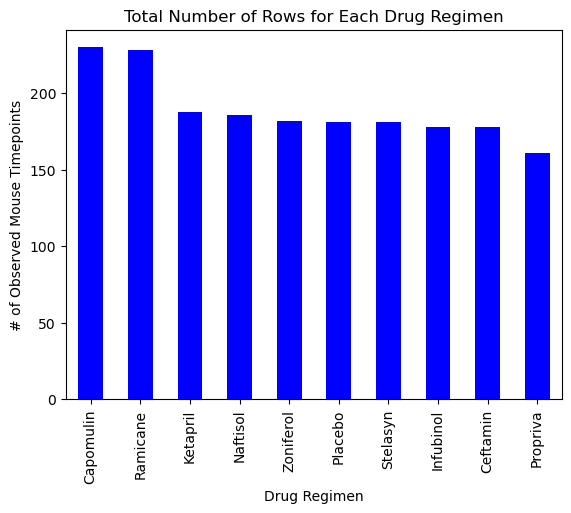

In [151]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Calculate the total number of rows for each drug regimen
regimen_counts = cleaned_df["Drug Regimen"].value_counts()

# Create a bar plot using Pandas
regimen_counts.plot(kind="bar", color="b")

# Set the xlabel, ylabel, and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total Number of Rows for Each Drug Regimen")

# Show the plot
plt.show()

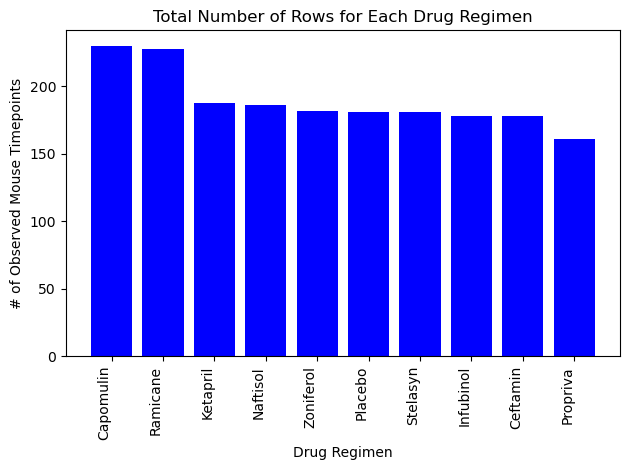

In [153]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#Calculate the total number of rows for each drug regimen
regimen_counts = cleaned_df["Drug Regimen"].value_counts()

# Extract x_axis and y_axis data
x_axis = regimen_counts.index.values
y_axis = regimen_counts.values

# Create a bar plot using pyplot
plt.bar(x_axis, y_axis, color="b")

# Set the xlabel, ylabel, and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total Number of Rows for Each Drug Regimen")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha="right")

# Show the plot
plt.tight_layout()
plt.show()

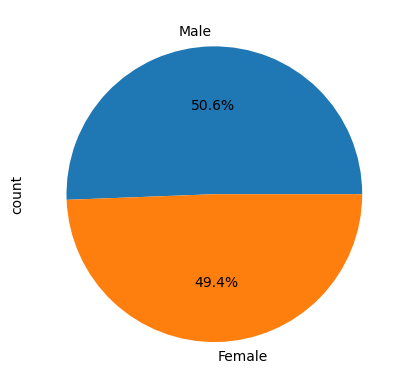

In [158]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = cleaned_df["Sex"].value_counts()
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

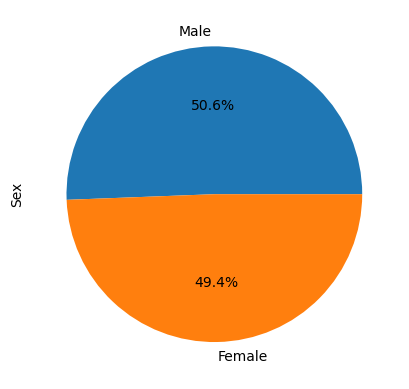

In [160]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y="Total Count", autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [173]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ceftamin", :]

In [182]:
# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [183]:
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [185]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_merge.to_csv("output.csv")
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [186]:
# Infubinol 
# Determine outliers using upper and lower bounds

Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [187]:
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
Infubinol_merge.to_csv("output.csv")

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [188]:
# Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [189]:
# Ceftamin quartiles and IQR
# Determine outliers using upper and lower bounds

Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


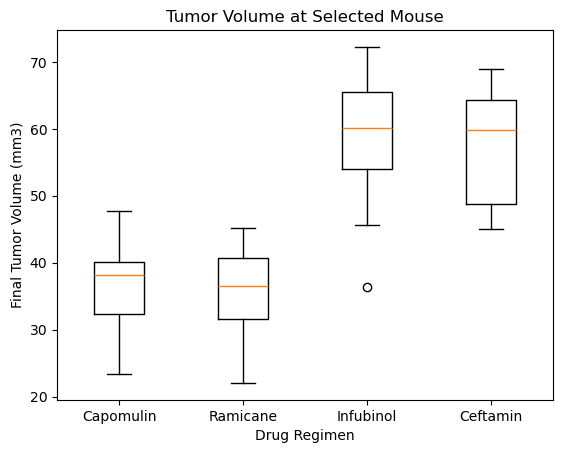

In [190]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
#data_to_plot=data_to_plot.values
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, vert=True)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

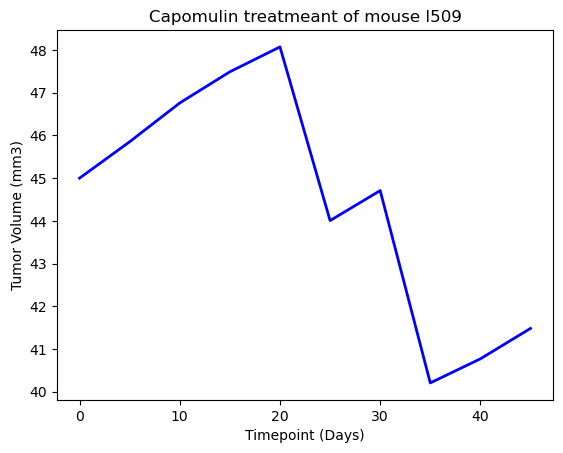

In [192]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2,color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

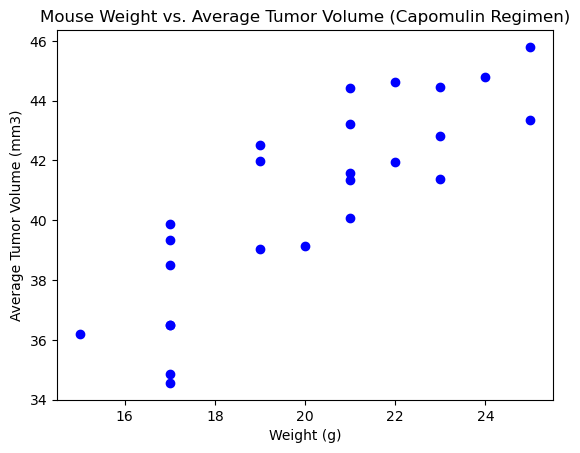

In [195]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Group by "Mouse ID" and calculate the mean tumor volume
avg_tumor_volume = Capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Group by "Mouse ID" to get the weight of each mouse
mouse_weight = Capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()

# Merge the two groupby results on "Mouse ID"
scatter_data = pd.merge(avg_tumor_volume, mouse_weight, on="Mouse ID", how="inner")

# Create scatter plot
plt.scatter(scatter_data["Weight (g)"], scatter_data["Tumor Volume (mm3)"], color="blue")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

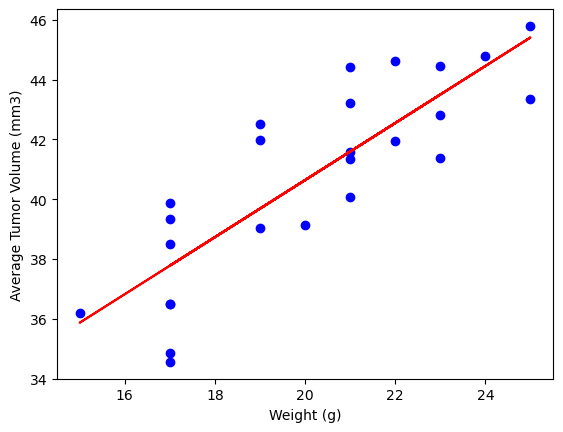

In [207]:
# Calculate the correlation coefficient and a linear regression model 

# Scatter plot
plt.scatter(scatter_data["Weight (g)"], scatter_data["Tumor Volume (mm3)"], color="blue", label="Data")

# Linear regression line
x_values = scatter_data["Weight (g)"]
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color="red", label="Regression Line")

# Add labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show plot
plt.show()